In [1]:
# Hemos buscado y descargado el conjunto de datos de Breast Cancer Wisconsin del repertorio UCI Machine Learning

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

In [3]:
#Comenzamos a cargarlo el DataFrame y los nombres de columnas
col_names = ['a','b','c','d','e','f','g','h','i','j','k']
df = pd.read_csv('breast-cancer-wisconsin.csv', names=col_names)
print(df.shape)

(699, 11)


In [12]:
#Pasamos a NaN los datos faltantes
df[df == '?'] = np.nan
print(df.isnull().sum())
mask = df['g'].isnull()
print(df[mask])

a     0
b     0
c     0
d     0
e     0
f     0
g    16
h     0
i     0
j     0
k     0
dtype: int64
           a  b  c  d  e  f    g  h   i  j  k
23   1057013  8  4  5  1  2  NaN  7   3  1  4
40   1096800  6  6  6  9  6  NaN  7   8  1  2
139  1183246  1  1  1  1  1  NaN  2   1  1  2
145  1184840  1  1  3  1  2  NaN  2   1  1  2
158  1193683  1  1  2  1  3  NaN  1   1  1  2
164  1197510  5  1  1  1  2  NaN  3   1  1  2
235  1241232  3  1  4  1  2  NaN  3   1  1  2
249   169356  3  1  1  1  2  NaN  3   1  1  2
275   432809  3  1  3  1  2  NaN  2   1  1  2
292   563649  8  8  8  1  2  NaN  6  10  1  4
294   606140  1  1  1  1  2  NaN  2   1  1  2
297    61634  5  4  3  1  2  NaN  2   3  1  2
315   704168  4  6  5  6  7  NaN  4   9  1  2
321   733639  3  1  1  1  2  NaN  3   1  1  2
411  1238464  1  1  1  1  1  NaN  2   1  1  2
617  1057067  1  1  1  1  1  NaN  1   1  1  2


In [13]:
""" 
Aplicamos las estrategias de eliminación de los valores que faltan estudiadas y compara sus efectos
Cuestiónate si en este caso alguna podría ser una solución factible al problema de los datos perdidos
"""
cleaning = df.dropna()
print(cleaning)

           a  b   c   d  e  f   g   h   i  j  k
0    1000025  5   1   1  1  2   1   3   1  1  2
1    1002945  5   4   4  5  7  10   3   2  1  2
2    1015425  3   1   1  1  2   2   3   1  1  2
3    1016277  6   8   8  1  3   4   3   7  1  2
4    1017023  4   1   1  3  2   1   3   1  1  2
..       ... ..  ..  .. .. ..  ..  ..  .. .. ..
694   776715  3   1   1  1  3   2   1   1  1  2
695   841769  2   1   1  1  2   1   1   1  1  2
696   888820  5  10  10  3  7   3   8  10  2  4
697   897471  4   8   6  4  3   4  10   6  1  4
698   897471  4   8   8  5  4   5  10   4  1  4

[683 rows x 11 columns]


In [14]:
# Eliminar filas en las que todos los valores que faltan o son NaN
cleaning = df.dropna(how='all')
print(cleaning)

           a  b   c   d  e  f   g   h   i  j  k
0    1000025  5   1   1  1  2   1   3   1  1  2
1    1002945  5   4   4  5  7  10   3   2  1  2
2    1015425  3   1   1  1  2   2   3   1  1  2
3    1016277  6   8   8  1  3   4   3   7  1  2
4    1017023  4   1   1  3  2   1   3   1  1  2
..       ... ..  ..  .. .. ..  ..  ..  .. .. ..
694   776715  3   1   1  1  3   2   1   1  1  2
695   841769  2   1   1  1  2   1   1   1  1  2
696   888820  5  10  10  3  7   3   8  10  2  4
697   897471  4   8   6  4  3   4  10   6  1  4
698   897471  4   8   8  5  4   5  10   4  1  4

[699 rows x 11 columns]


### 

In [16]:
# Eliminar columnas con un valor o más que faltan
cleaning = df.dropna(axis=1)
print(cleaning)

           a  b   c   d  e  f   h   i  j  k
0    1000025  5   1   1  1  2   3   1  1  2
1    1002945  5   4   4  5  7   3   2  1  2
2    1015425  3   1   1  1  2   3   1  1  2
3    1016277  6   8   8  1  3   3   7  1  2
4    1017023  4   1   1  3  2   3   1  1  2
..       ... ..  ..  .. .. ..  ..  .. .. ..
694   776715  3   1   1  1  3   1   1  1  2
695   841769  2   1   1  1  2   1   1  1  2
696   888820  5  10  10  3  7   8  10  2  4
697   897471  4   8   6  4  3  10   6  1  4
698   897471  4   8   8  5  4  10   4  1  4

[699 rows x 10 columns]


In [17]:
#Eliminar columnas cuando todos sus datos faltan
cleaning = df.dropna(how='all', axis=1)
print(cleaning)

           a  b   c   d  e  f   g   h   i  j  k
0    1000025  5   1   1  1  2   1   3   1  1  2
1    1002945  5   4   4  5  7  10   3   2  1  2
2    1015425  3   1   1  1  2   2   3   1  1  2
3    1016277  6   8   8  1  3   4   3   7  1  2
4    1017023  4   1   1  3  2   1   3   1  1  2
..       ... ..  ..  .. .. ..  ..  ..  .. .. ..
694   776715  3   1   1  1  3   2   1   1  1  2
695   841769  2   1   1  1  2   1   1   1  1  2
696   888820  5  10  10  3  7   3   8  10  2  4
697   897471  4   8   6  4  3   4  10   6  1  4
698   897471  4   8   8  5  4   5  10   4  1  4

[699 rows x 11 columns]


In [18]:
#Eliminar filas o columnas cuando al menos haya 'n' valores faltantes
cleaning = df.dropna(axis=1, thresh=1)
print(cleaning.shape)

(699, 11)


In [19]:
"""
Aplica las estrategias de imputación, tanto univariantes como multivariantes, de valores faltantes estudiadas
IMPUTACIÓN VARIANTE:"""

# - Sustitución por un valor constante
new_data = df.fillna(0)
df.replace(to_replace=np.nan, value=0)

#Sustitución por el valor anterior o posterior
new_data1= df.fillna(method='pad') # --> Valor anterior
new_data2 = df.fillna(method='bfill') #--> Valor porterior

# Sustitución por valor interpolado
new_data3 = df.interpolate(method='linear', limit_direction='forward')

#Clase SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df)
new_data4 = imputer.transform(df)

# iMPUTACION UNIVARIANTE
# Modelo KNN

x = df[df.columns[:-1]]
imputer = KNNImputer()
imputer.fit(x)
new_data5 = imputer.transform(x)


<AxesSubplot: >

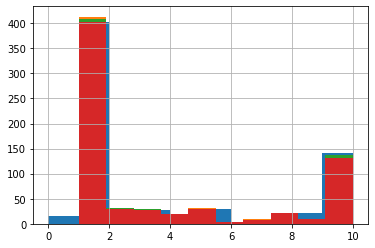

In [20]:
x1 = new_data['g'].astype(float)
x1.hist()

x2 = new_data1['g'].astype(float)
x2.hist()

x3 = new_data2['g'].astype(float)
x3.hist()

x4 = new_data3['g'].astype(float)
x4.hist()